In [23]:
from math import e
from optimisation_ntn.simulation import Simulation, SimulationConfig
from optimisation_ntn.algorithms.assignment.qlearning_trainer import QLearningTrainer
import numpy as np
from optimisation_ntn.algorithms.assignment.strategy_factory import QLearningAssignment

np.random.seed(1)

# Create simulation
sim = Simulation(
    config=SimulationConfig(
        seed=None,
        debug=False,
        user_count=10,
        power_strategy="OnDemand",
        save_results=False,
    )
)

# Create trainer
trainer = QLearningTrainer(
    simulation=sim,
    episodes=10,
    save_path="qtable.pkl",
)

# Train the agent
trainer.train()

# Test the trained agent
print("\nTesting trained agent...")
sim = Simulation(
    config=SimulationConfig(
        seed=3,
        debug=False,
        user_count=10,
        power_strategy="OnDemand",
        save_results=False,
    )
)
sim.reset()
strategy = QLearningAssignment(sim.network, epsilon=0.0, qtable_path="qtable.pkl")
sim.assignment_strategy = strategy
sim.run()

print(f"Trained agent Final energy consumed: {sim.system_energy_consumed:.2f}")
print(
    f"Trained agent Final QoS satisfaction: {sim.evaluate_qos_satisfaction()/100:.2%}"
)

sim.reset()
strategy = QLearningAssignment(sim.network, epsilon=0.0)
sim.assignment_strategy = strategy
sim.run()

print(f"Random agent Final energy consumed: {sim.system_energy_consumed:.2f}")
print(f"Random agent Final QoS satisfaction: {sim.evaluate_qos_satisfaction()/100:.2%}")

Max energy: 2557.14, Min energy: 1000.00
Starting training...
Episode 10/10 (10 Users)
Total Energy: 2037.65J
QoS Score: 100.00
Epsilon: 0.914
---
Training completed!
Best reward: -inf
Best QoS: -inf
Best Energy Score: -inf

Testing trained agent...
Trained agent Final energy consumed: 818.20
Trained agent Final QoS satisfaction: 80.00%
Random agent Final energy consumed: 500.75
Random agent Final QoS satisfaction: 66.67%


In [24]:
from math import e
from optimisation_ntn.simulation import Simulation, SimulationConfig
from optimisation_ntn.algorithms.assignment.qlearning_trainer import QLearningTrainer
import numpy as np
from optimisation_ntn.algorithms.assignment.strategy_factory import QLearningAssignment

np.random.seed(1)

energy_consumed = []
qos_satisfaction = []

# Create simulation
sim = Simulation(
    config=SimulationConfig(
        seed=None,
        debug=False,
        user_count=100,
        power_strategy="OnDemand",
        save_results=False,
    )
)

# Create trainer
trainer = QLearningTrainer(
    simulation=sim,
    episodes=500,
    save_path="qtable.pkl",
)

# Train the agent
results = trainer.train()

# Test the trained agent
print("\nTesting trained agent...")
sim = Simulation(
    config=SimulationConfig(
        seed=20,
        debug=False,
        user_count=100,
        power_strategy="OnDemand",
        save_results=False,
    )
)
sim.reset()
strategy = QLearningAssignment(sim.network, epsilon=0.0, qtable_path="qtable.pkl")
sim.assignment_strategy = strategy
sim.run()

print(f"Trained agent Final energy consumed: {sim.system_energy_consumed:.2f}")
print(
    f"Trained agent Final QoS satisfaction: {sim.evaluate_qos_satisfaction()/100:.2%}"
)

qos_satisfaction.append(sim.evaluate_qos_satisfaction() / 100)
energy_consumed.append(sim.system_energy_consumed)

print(energy_consumed)
print(qos_satisfaction)

Max energy: 25000.00, Min energy: 3919.66
Starting training...
Episode 10/500 (100 Users)
Total Energy: 8483.79J
QoS Score: 91.84
Epsilon: 0.914
---
Episode 20/500 (100 Users)
Total Energy: 7142.12J
QoS Score: 95.12
Epsilon: 0.826
---
Episode 30/500 (100 Users)
Total Energy: 7416.58J
QoS Score: 95.45
Epsilon: 0.747
---
Episode 40/500 (100 Users)
Total Energy: 6725.59J
QoS Score: 91.67
Epsilon: 0.676
---
Episode 50/500 (100 Users)
Total Energy: 7367.93J
QoS Score: 92.11
Epsilon: 0.611
---
Episode 60/500 (100 Users)
Total Energy: 6550.19J
QoS Score: 91.18
Epsilon: 0.553
---
Episode 70/500 (100 Users)
Total Energy: 5589.77J
QoS Score: 93.55
Epsilon: 0.500
---
Episode 80/500 (100 Users)
Total Energy: 6297.28J
QoS Score: 90.62
Epsilon: 0.452
---
Episode 90/500 (100 Users)
Total Energy: 5801.91J
QoS Score: 86.67
Epsilon: 0.409
---
Episode 100/500 (100 Users)
Total Energy: 6164.28J
QoS Score: 85.29
Epsilon: 0.370
---
Episode 110/500 (100 Users)
Total Energy: 5528.31J
QoS Score: 90.91
Epsilon:

In [25]:
qos_scores = [result["qos_score"] / 100 for result in results]
energy_scores = [result["total_energy"] for result in results]

In [26]:
energy_times_qos = [energy_scores[i] / qos_scores[i] for i in range(len(qos_scores))]

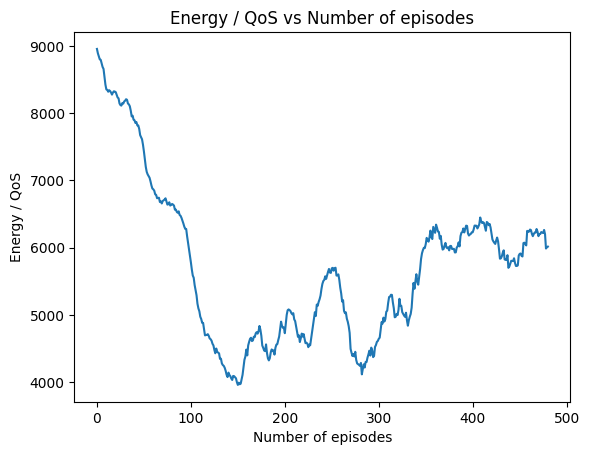

In [27]:
import matplotlib.pyplot as plt

rooling_average = 20
energy_times_qos_moved = (
    np.convolve(energy_times_qos, np.ones(rooling_average), "valid") / rooling_average
)

plt.plot(range(0, len(energy_times_qos_moved)), energy_times_qos_moved)
plt.xlabel("Number of episodes")
plt.ylabel("Energy / QoS")
plt.title("Energy / QoS vs Number of episodes")
plt.show()

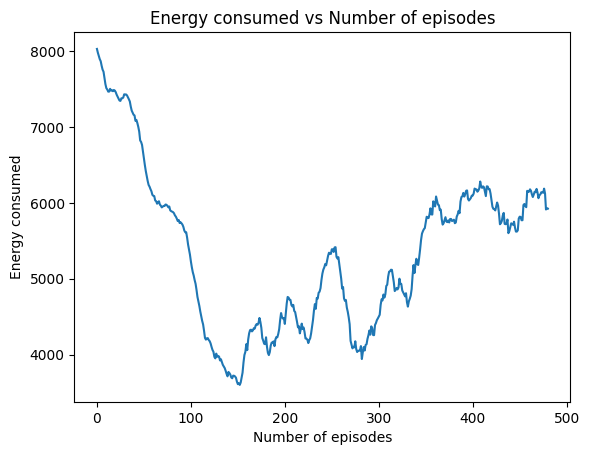

In [28]:
import matplotlib.pyplot as plt

moving_average = 20
energy_scores_moved = (
    np.convolve(energy_scores, np.ones(moving_average), "valid") / moving_average
)

plt.plot(range(0, len(energy_scores_moved)), energy_scores_moved)
plt.xlabel("Number of episodes")
plt.ylabel("Energy consumed")
plt.title("Energy consumed vs Number of episodes")
plt.show()

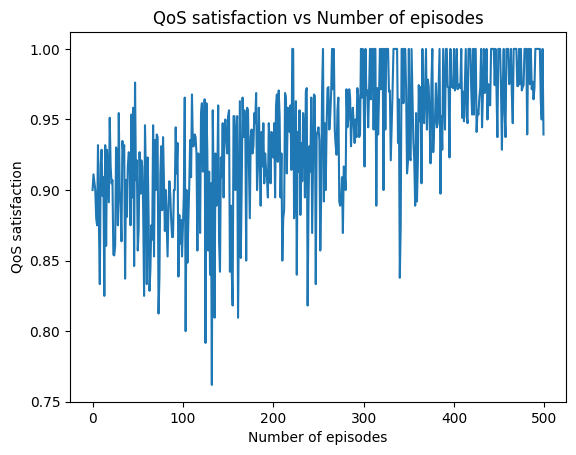

In [29]:
plt.plot(range(0, len(qos_scores)), qos_scores)
plt.xlabel("Number of episodes")
plt.ylabel("QoS satisfaction")
plt.title("QoS satisfaction vs Number of episodes")
plt.show()

In [30]:
from optimisation_ntn.simulation import Simulation, SimulationConfig
from optimisation_ntn.algorithms.assignment.matrix_based import MatrixBasedAssignment
import numpy as np

from optimisation_ntn.algorithms.assignment.strategy_factory import (
    QLearningAssignment,
    RandomAssignment,
    TimeGreedyAssignment,
    ClosestNodeAssignment,
    HAPSOnlyAssignment,
)

sim = Simulation(
    config=SimulationConfig(
        seed=10,
        user_count=10,
        power_strategy="OnDemand",
        save_results=False,
    )
)

assignment_vector = np.array([0, 0, 3, 0, 4, 4, 4, 4, 4, 3])
assignment_vector = np.array([4, 0, 2, 1])
matrix_strategy = MatrixBasedAssignment(sim.network)
matrix_strategy.set_assignment_matrix(assignment_vector)
sim.assignment_strategy = matrix_strategy

while sim.current_time < sim.max_time:
    sim.step()

energy_consumed = sim.system_energy_consumed
print(energy_consumed)
print(sim.evaluate_qos_satisfaction())

788.619905246301
40.0


In [31]:
sim.reset()
assignment_vector = np.array([0, 0, 3, 0, 4, 4, 4, 4, 4, 3])
assignment_vector = np.array([0, 3, 3, 0, 0, 1, 2, 0, 4, 2])
matrix_strategy = MatrixBasedAssignment(sim.network)
matrix_strategy.set_assignment_matrix(assignment_vector)
sim.assignment_strategy = matrix_strategy

while sim.current_time < sim.max_time:
    sim.step()

energy_consumed = sim.system_energy_consumed
print(energy_consumed)
print(sim.evaluate_qos_satisfaction())

1525.2298104925999
87.5


In [32]:
strategies = [
    QLearningAssignment,
    RandomAssignment,
    TimeGreedyAssignment,
    ClosestNodeAssignment,
    HAPSOnlyAssignment,
]

sim = Simulation(
    config=SimulationConfig(
        seed=1,
        user_count=10,
        power_strategy="OnDemand",
        save_results=False,
    )
)

strategy_instance = RandomAssignment(sim.network)
sim.assignment_strategy = strategy_instance
sim.run()
energy_consumed = sim.system_energy_consumed
qos_score = sim.evaluate_qos_satisfaction()

for strategy in strategies:
    sim.reset()
    strategy_instance = strategy(sim.network)
    sim.assignment_strategy = strategy_instance
    sim.run()
    energy_consumed = sim.system_energy_consumed
    qos_score = sim.evaluate_qos_satisfaction()
    print("-" * 10)
    print(strategy.__name__)
    print(energy_consumed)
    print(qos_score)

----------
QLearningAssignment
661.5499526231498
75.0
----------
RandomAssignment
1866.4297157388976
100.0
----------
TimeGreedyAssignment
2242.1795736083473
90.0
----------
ClosestNodeAssignment
1567.9099999999987
100.0
----------
HAPSOnlyAssignment
500.75
66.66666666666666


In [33]:
# do a brute force search for the best assignment matrix

import itertools
from optimisation_ntn.algorithms.assignment.strategy_factory import (
    AssignmentStrategyFactory,
)
from optimisation_ntn.simulation import Simulation, SimulationConfig
import numpy as np

sim = Simulation(
    config=SimulationConfig(
        seed=1,
        user_count=2,
        power_strategy="OnDemand",
        save_results=False,
    )
)


n_nodes = len(sim.network.compute_nodes)
n_users = len(sim.network.user_nodes)

all_matrices = list(itertools.product(range(n_nodes), repeat=n_users))
print(len(all_matrices))

min_energy = float("inf")
best_matrix = None
# run all the combinations of assignment matrices (n_nodes^n_users)
for i in range(len(all_matrices)):
    assignment_matrix = all_matrices[i]
    sim.reset()
    sim.run_with_assignment(assignment_matrix)
    energy_consumed = sim.system_energy_consumed
    qos_score = sim.evaluate_qos_satisfaction()
    # print(energy_consumed)
    # print(qos_score)
    if qos_score == 100:
        if energy_consumed < min_energy:
            print(f"New best matrix found! Energy: {energy_consumed}, QoS: {qos_score}")
            min_energy = energy_consumed
            best_matrix = assignment_matrix

    if i % 100 == 0:
        print(f"Processed {i/len(all_matrices)*100:.2f}%")

print(best_matrix)
print(min_energy)

36
New best matrix found! Energy: 433.0, QoS: 100.0
Processed 0.00%
New best matrix found! Energy: 414.6099526231504, QoS: 100.0
New best matrix found! Energy: 414.5900000000007, QoS: 100.0
New best matrix found! Energy: 397.80995262314906, QoS: 100.0
New best matrix found! Energy: 397.7900000000013, QoS: 100.0
(1, 4)
397.7900000000013
